In [1]:
# Importing Libraries

In [3]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [4]:
# Loading Data

df=pd.read_excel("/kaggle/input/rainfall-dataset/flood dataset.xlsx")

In [5]:
df

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0
...,...,...,...,...,...,...,...,...,...,...,...
110,28,71,30,3035.1,66.2,313.5,2209.1,446.3,262.833333,664.3,0
111,29,71,37,2151.1,18.3,287.4,1535.6,309.8,143.433333,335.0,0
112,30,74,42,3255.4,43.9,218.5,2561.2,431.8,347.566667,923.4,1
113,31,71,31,3046.4,14.9,364.5,2164.8,502.1,151.466667,203.4,0


In [6]:
# to find the number of columns and row
df.shape

(115, 11)

In [7]:
#to List out the total number of columns 
df.columns

Index(['Temp', 'Humidity', 'Cloud Cover', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec', 'avgjune', 'sub', 'flood'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         115 non-null    int64  
 1   Humidity     115 non-null    int64  
 2   Cloud Cover  115 non-null    int64  
 3   ANNUAL       115 non-null    float64
 4   Jan-Feb      115 non-null    float64
 5   Mar-May      115 non-null    float64
 6   Jun-Sep      115 non-null    float64
 7   Oct-Dec      115 non-null    float64
 8   avgjune      115 non-null    float64
 9   sub          115 non-null    float64
 10  flood        115 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 10.0 KB


In [9]:
# EDA Explotatory Data Anlysis
# Unavriante Analyisis

/tmp/ipykernel_33/969930852.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temp'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Temp', ylabel='Density'>

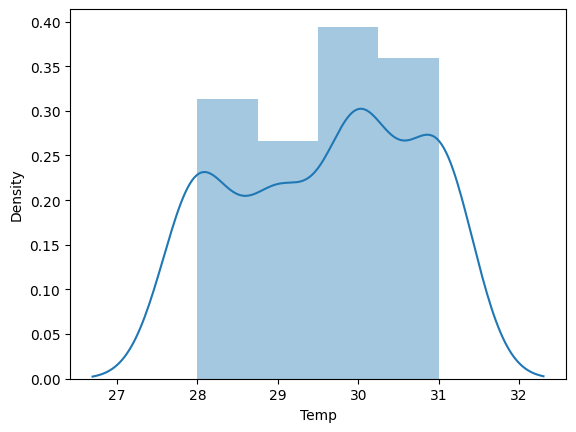

In [10]:
sns.distplot(df['Temp'])

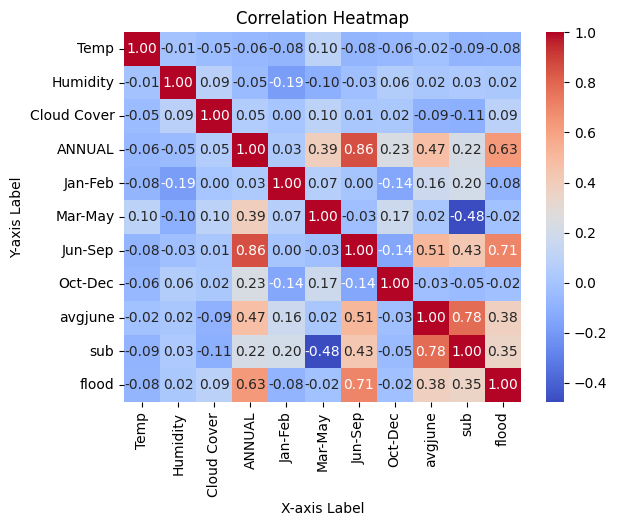

In [11]:
# Multivariate Anlysis
# Create a heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels
plt.title('Correlation Heatmap')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show plot
plt.show()

In [12]:
#Descriptive Analysis
df.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


In [13]:
df.describe()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,29.600000,73.852174,36.286957,2925.487826,27.739130,377.253913,2022.840870,497.636522,218.100870,439.801739,0.139130
std,1.122341,2.947623,4.330158,422.112193,22.361032,151.091850,386.254397,129.860643,62.547597,210.438813,0.347597
min,28.000000,70.000000,30.000000,2068.800000,0.300000,89.900000,1104.300000,166.600000,65.600000,34.200000,0.000000
25%,29.000000,71.000000,32.500000,2627.900000,10.250000,276.750000,1768.850000,407.450000,179.666667,295.000000,0.000000
50%,30.000000,74.000000,36.000000,2937.500000,20.500000,342.000000,1948.700000,501.500000,211.033333,430.600000,0.000000
75%,31.000000,76.000000,40.000000,3164.100000,41.600000,442.300000,2242.900000,584.550000,263.833333,577.650000,0.000000
max,31.000000,79.000000,44.000000,4257.800000,98.100000,915.200000,3451.300000,823.300000,366.066667,982.700000,1.000000


In [14]:
df.dtypes

Temp             int64
Humidity         int64
Cloud Cover      int64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
avgjune        float64
sub            float64
flood            int64
dtype: object

In [15]:
# Data PreProcessing
#Checking for Null Values

In [16]:
df.isna().sum()

Temp           0
Humidity       0
Cloud Cover    0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
avgjune        0
sub            0
flood          0
dtype: int64

In [19]:
#printing overall sum of NullValues 
print("The Total Number of Null Values-->",df.isna().sum().sum())

The Total Number of Null Values--> 0


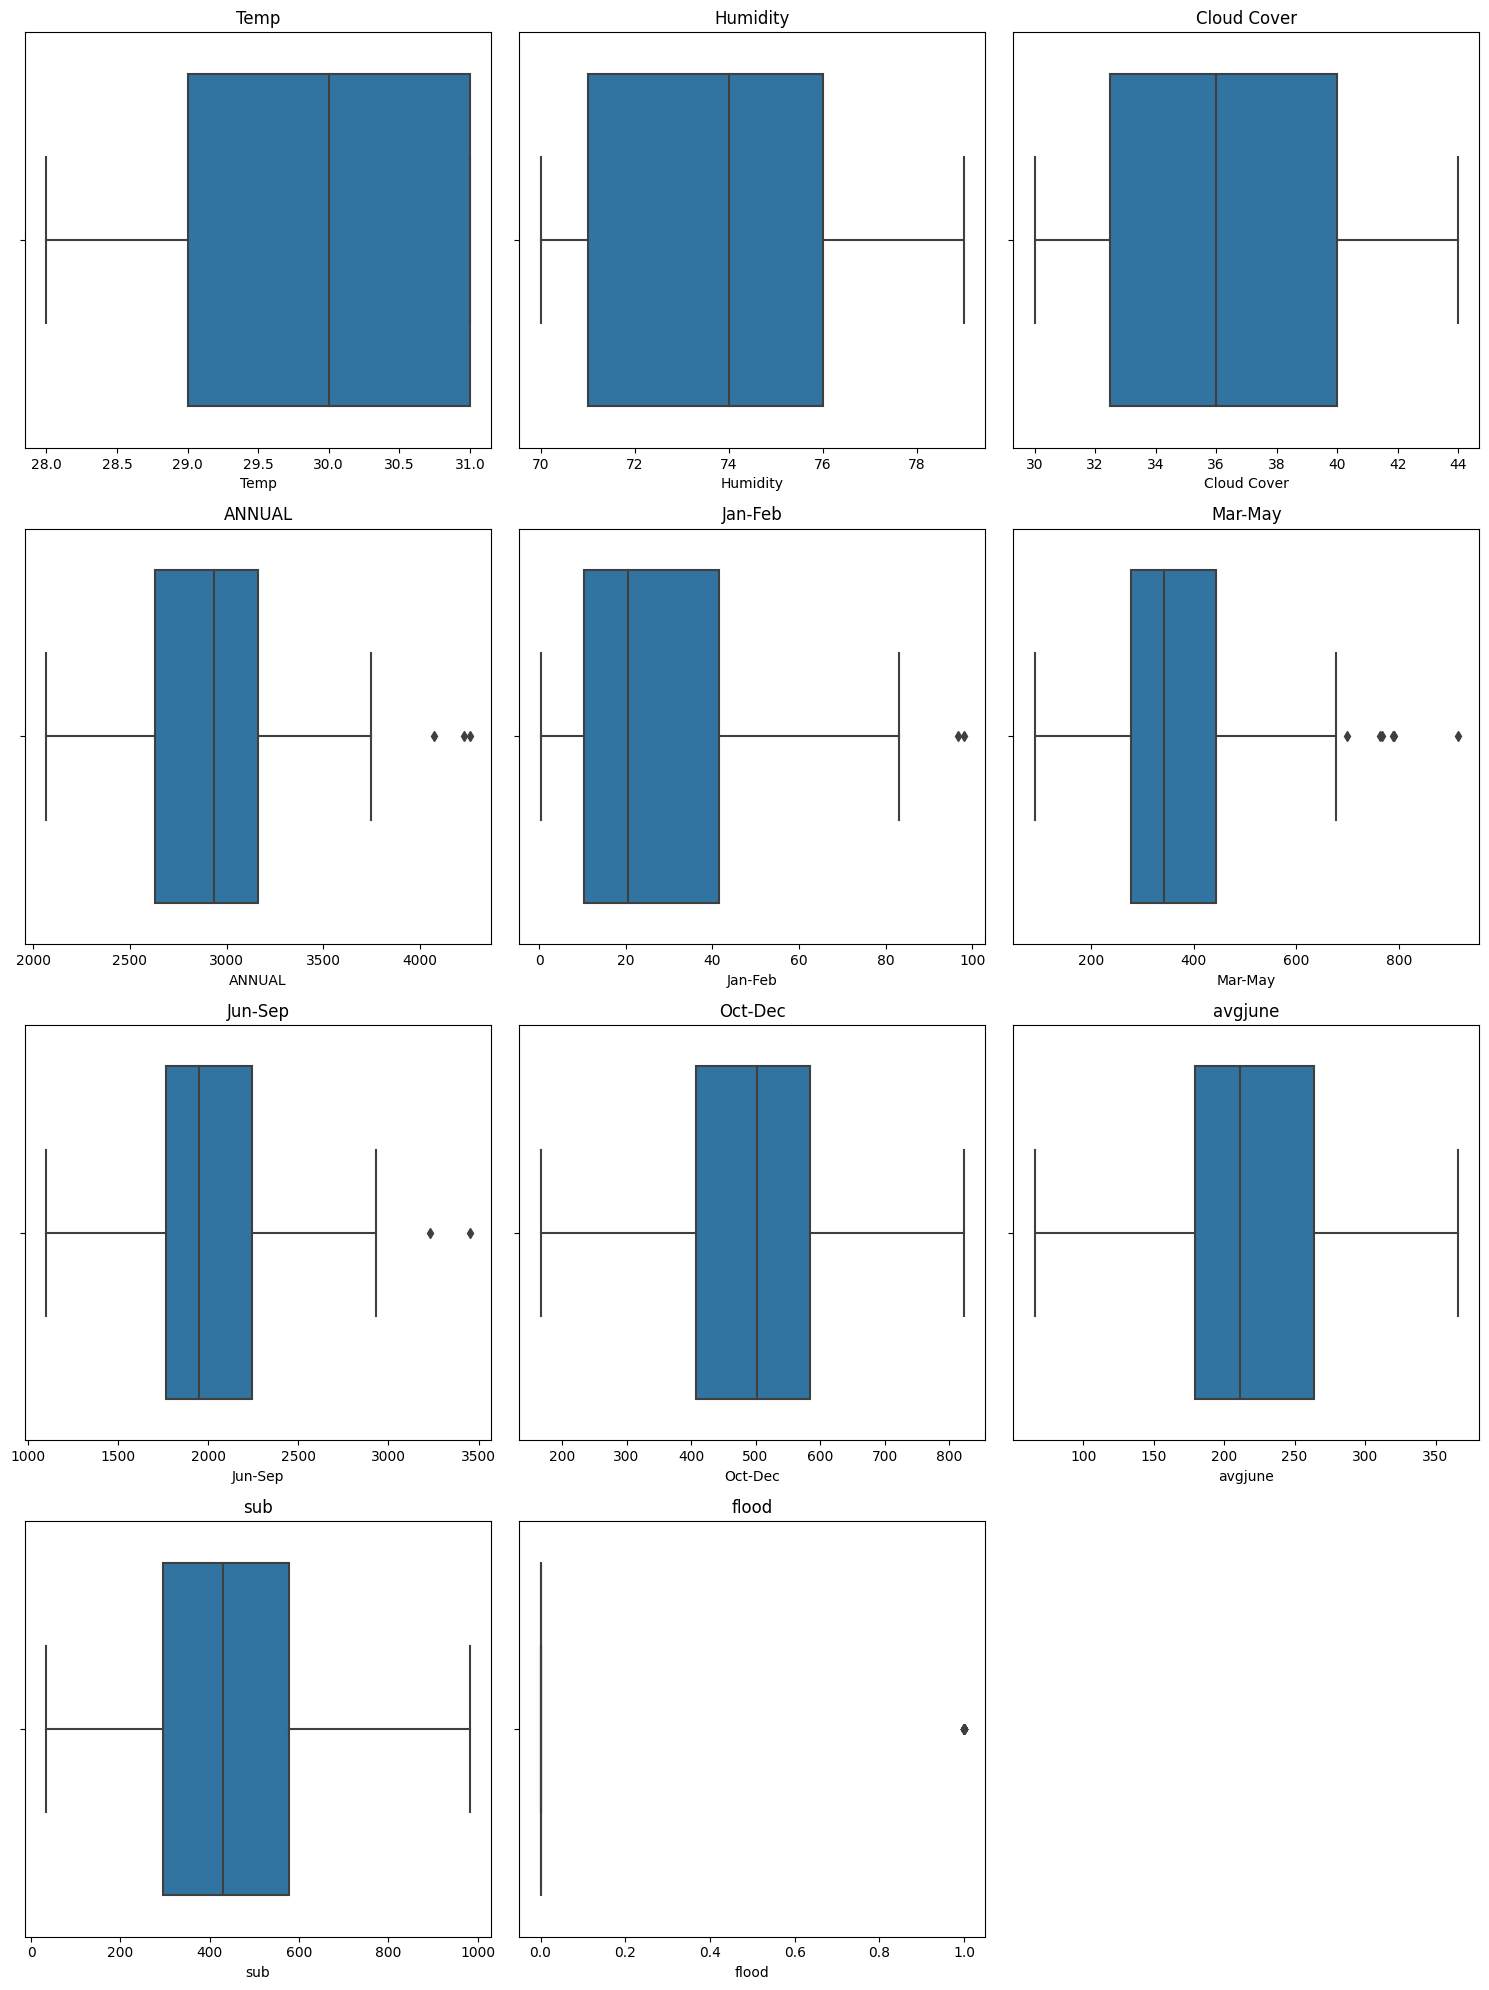

In [23]:
# Determine the number of rows and columns for subplots
import math
num_cols = 3
num_rows = math.ceil(len(df.columns) / num_cols)

# Set up the figure and axes
plt.figure(figsize=(15, 5*num_rows))

# Iterate over each column in the DataFrame
for i, column in enumerate(df.columns):
    # Create a boxplot for the current column
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=df[column])
    
    # Add title with column name
    plt.title(column)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [24]:
# No Outliers Present
# Checking for Categorical Columns
df.dtypes

Temp             int64
Humidity         int64
Cloud Cover      int64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
avgjune        float64
sub            float64
flood            int64
dtype: object

In [25]:
# all columns are other than Objects so no Categorical Columns

In [26]:
# Splitting the Dataset into x and y


In [33]:
x=df.iloc[:,2:7].values
y=df.iloc[:,10:].values

In [34]:
x

array([[3.0000e+01, 3.2486e+03, 7.3400e+01, 3.8620e+02, 2.1228e+03],
       [4.0000e+01, 3.3266e+03, 9.3000e+00, 2.7570e+02, 2.4034e+03],
       [4.2000e+01, 3.2712e+03, 2.1700e+01, 3.3630e+02, 2.3430e+03],
       [4.4000e+01, 3.1297e+03, 2.6700e+01, 3.3940e+02, 2.3982e+03],
       [4.0000e+01, 2.7416e+03, 2.3400e+01, 3.7850e+02, 1.8815e+03],
       [3.8000e+01, 2.7080e+03, 3.4100e+01, 2.3000e+02, 1.9431e+03],
       [4.0000e+01, 3.6711e+03, 2.3700e+01, 3.2800e+02, 2.7378e+03],
       [3.6000e+01, 2.6483e+03, 2.8800e+01, 2.8370e+02, 2.0236e+03],
       [4.0000e+01, 3.0502e+03, 6.5900e+01, 6.2830e+02, 1.9404e+03],
       [3.4000e+01, 2.8486e+03, 2.8400e+01, 2.9670e+02, 1.8865e+03],
       [3.0000e+01, 2.7267e+03, 7.3000e+00, 2.4970e+02, 1.9340e+03],
       [4.0000e+01, 3.4513e+03, 1.6900e+01, 3.5110e+02, 2.4531e+03],
       [3.2000e+01, 2.6108e+03, 8.3000e+00, 2.9520e+02, 1.7290e+03],
       [3.5000e+01, 2.8991e+03, 7.6000e+00, 2.1500e+02, 2.0661e+03],
       [3.3000e+01, 3.0245e+03, 4.

In [35]:
y

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Check the shapes of the resulting arrays to ensure correct splitting
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (86, 5)
X_test shape: (29, 5)
y_train shape: (86, 1)
y_test shape: (29, 1)


In [38]:
from sklearn.preprocessing import StandardScaler


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train= scaler.fit_transform(x_train)

# Transform the testing data using the scaler fitted on the training data
X_test = scaler.transform(x_test)

# Check the shapes of the scaled training and testing sets
print("Shape of X_train_scaled:", x_train.shape)
print("Shape of X_test_scaled:", x_test.shape)


Shape of X_train_scaled: (86, 5)
Shape of X_test_scaled: (29, 5)


In [40]:
from joblib import dump
dump(scaler,"transform.save")

['transform.save']

In [41]:
# Applying Models
# Initialize models
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
xgb_model = XGBClassifier()

# Fit models
dt_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)

/tmp/ipykernel_33/3540545850.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
from sklearn.metrics import accuracy_score

# Make predictions
dt_pred = dt_model.predict(x_test)
rf_pred = rf_model.predict(x_test)
knn_pred = knn_model.predict(x_test)
xgb_pred = xgb_model.predict(x_test)

# Calculate accuracy scores
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Print accuracy scores
print("Decision Tree Accuracy:", dt_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("XGBoost Accuracy:", xgb_accuracy)


Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
K-Nearest Neighbors Accuracy: 0.9655172413793104
XGBoost Accuracy: 1.0


In [43]:
from joblib import dump
dump(xgb_model,"flood.save")

['flood.save']

In [46]:
import joblib
model = joblib.load('/kaggle/working/flood.save')
sc=joblib.load('/kaggle/working/transform.save')

In [49]:
df

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0
...,...,...,...,...,...,...,...,...,...,...,...
110,28,71,30,3035.1,66.2,313.5,2209.1,446.3,262.833333,664.3,0
111,29,71,37,2151.1,18.3,287.4,1535.6,309.8,143.433333,335.0,0
112,30,74,42,3255.4,43.9,218.5,2561.2,431.8,347.566667,923.4,1
113,31,71,31,3046.4,14.9,364.5,2164.8,502.1,151.466667,203.4,0


In [55]:
list(df.iloc[112,2:7])

[42.0, 3255.4, 43.9, 218.5, 2561.2]

In [63]:
df.iloc[:,10:].value_counts()

flood
0        99
1        16
Name: count, dtype: int64